<a href="https://colab.research.google.com/github/seecruz/python_training/blob/main/python/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build Linear Regression Model in Python**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, I will be showing you how to build a linear regression model in Python using the scikit-learn package.

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

### CC Walkthrough
##### 2022-04-13: CC
Save a copy to GitHub

## **Load the Diabetes dataset** (via scikit-learn)

### **Import library**

In [1]:
from sklearn import datasets

### **Load dataset**

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, b

### **Description of the Diabetes dataset**

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### **Feature names**

In [5]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### **Create X and Y data matrices**

In [6]:
X = diabetes.data
Y = diabetes.target

In [7]:
X.shape, Y.shape

((442, 10), (442,))

### **Load dataset + Create X and Y data matrices (in 1 step)**

In [8]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [9]:
X.shape, Y.shape

((442, 10), (442,))

## **Load the Boston Housing dataset (via GitHub)**

The Boston Housing dataset was obtained from the mlbench R package, which was loaded using the following commands:

```
library(mlbench)
data(BostonHousing)
```

For your convenience, I have also shared the [Boston Housing dataset](https://github.com/dataprofessor/data/blob/master/BostonHousing.csv) on the Data Professor GitHub package.

### **Import library**

In [ ]:
import pandas as pd

### **Download CSV from GitHub**

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2020-03-30 07:43:30--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2020-03-30 07:43:36--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.03s   

2020-03-30 07:43:37 (1.25 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



### **Read in CSV file**

In [ ]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### **Split dataset to X and Y variables**

In [ ]:
Y = BostonHousing.medv
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [ ]:
X = BostonHousing.drop(['medv'], axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## **Data split**

### **Import library**

In [10]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [12]:
X_train.shape, Y_train.shape

((353, 10), (353,))

In [13]:
X_test.shape, Y_test.shape

((89, 10), (89,))

## **Linear Regression Model**

### **Import library**

In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [15]:
model = linear_model.LinearRegression()

#### Build training model

In [16]:
model.fit(X_train, Y_train)

LinearRegression()

#### Apply trained model to make prediction (on test set)

In [17]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [18]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [  -9.29733867 -241.40376226  480.78537604  327.31908534 -559.73253906
  228.81064764  -24.73533796  170.84447301  669.81376325   74.18928741]
Intercept: 152.28484095385235
Mean squared error (MSE): 2833.87
Coefficient of determination (R^2): 0.55


In [19]:
# print headers so they are close by for ease of viewing/comparing
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Equation for above linear regression model. Modified based on these results vs. the results he showed on his Youtube demo.

Y = -9.29733867*(age) -241.40376226*(sex) + 480.78537604*(bmi) + ..... + 152.28484095385235

### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [20]:
r2_score(Y_test, Y_pred)

0.5509388077122397

In [21]:
r2_score(Y_test, Y_pred).dtype

dtype('float64')

We will be using the modulo operator to format the numbers by rounding it off.

In [22]:
'%f' % 0.523810833536016

'0.523811'

We will now round it off to 3 digits

In [23]:
'%.3f' % 0.523810833536016

'0.524'

We will now round it off to 2 digits

In [24]:
'%.2f' % 0.523810833536016

'0.52'

## **Scatter plots**

### **Import library**

In [25]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [26]:
Y_test

array([ 52.,  54., 273., 257., 187., 180., 131.,  71., 168., 181., 108.,
        88., 168., 103., 242., 346., 121.,  59.,  49., 202.,  74., 118.,
       107., 265., 101., 263., 129., 115.,  65.,  77.,  42.,  52.,  96.,
       281., 148., 257.,  64., 302., 275.,  93., 246., 198.,  90., 235.,
        57.,  93., 219., 308., 220., 248., 109., 181., 279., 131., 265.,
       109., 225., 185.,  48., 261., 129., 170.,  67.,  72., 208.,  37.,
       242., 183., 281., 146., 197.,  60., 129.,  94., 265.,  83.,  59.,
       101., 115., 179., 132., 125.,  61.,  71.,  96., 180., 259., 202.,
       134.])

In [27]:
import numpy as np
np.array(Y_test)

array([ 52.,  54., 273., 257., 187., 180., 131.,  71., 168., 181., 108.,
        88., 168., 103., 242., 346., 121.,  59.,  49., 202.,  74., 118.,
       107., 265., 101., 263., 129., 115.,  65.,  77.,  42.,  52.,  96.,
       281., 148., 257.,  64., 302., 275.,  93., 246., 198.,  90., 235.,
        57.,  93., 219., 308., 220., 248., 109., 181., 279., 131., 265.,
       109., 225., 185.,  48., 261., 129., 170.,  67.,  72., 208.,  37.,
       242., 183., 281., 146., 197.,  60., 129.,  94., 265.,  83.,  59.,
       101., 115., 179., 132., 125.,  61.,  71.,  96., 180., 259., 202.,
       134.])

In [28]:
Y_pred

array([176.72127508,  92.71811018, 272.34084721, 192.96181007,
       139.75996039, 214.72629517, 157.93520428,  91.58180636,
       150.07548051,  88.2831121 , 104.65278369, 115.81757115,
       122.81828918, 125.98277778, 168.63994561, 263.86292935,
       168.72284017,  80.50189122,  88.6030005 , 210.47214719,
       131.19785526, 100.49099056, 111.13597815, 202.62953156,
       191.18920726, 262.08376774, 190.82046644, 133.75043035,
       100.706992  , 176.39585084,  86.20936385, 208.13622883,
        86.40172904, 239.14017991, 130.80512244, 223.81420679,
       119.80395724, 145.65785434, 216.28226915,  89.12102354,
       232.15785822, 153.48943213, 140.80124524, 167.65494198,
        47.5692106 , 143.39577548, 143.11089051, 258.26008091,
       210.17427436, 221.00961373, 201.01246047, 171.84145461,
       209.54572998, 130.70278945, 207.25966135, 168.60188346,
       224.63579591, 164.90636771,  54.87402009, 228.45255138,
       112.55157613, 131.91172004, 133.18520373,  58.27

#### Making the scatter plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


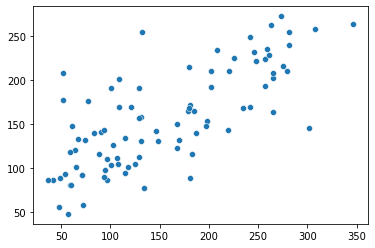

In [29]:
sns.scatterplot(Y_test, Y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


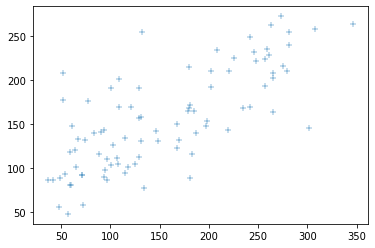

In [30]:
sns.scatterplot(Y_test, Y_pred, marker="+")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


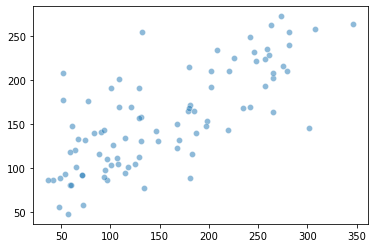

In [31]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)